In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt


Download the daily U.S. Treasury yield curve from here: https://www.federalreserve.gov/data/nominal-yield-curve.htm. That file has the daily parameters for the Nelson-Siegel-Svensson yield curve model discussed in class (beta0, beta1, beta2, beta3, tau1, tau2). With those parameters, you can calculate the yield of any maturity. For simplicity, you will trade zero-coupon bonds and you can assume that a bond of any maturity is available to trade

### Found this R code online as well from another student / same code: https://github.com/chen-bowen/Flattener_Trading_Strategy/blob/master/FlattenerTrading.R

In [2]:
data = pd.read_csv('gsw_yields.csv', index_col='Date')
data.index = pd.to_datetime(data.index)
data = data.loc[dt.date(1983,12,27):].ffill() #ffill the model parameters
data.index = [i.date() for i in data.index]
data

,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,SVENF03,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
1983-12-27,11.821015,-2.640453,-618.932663,619.467232,11.3897,12.3274,12.2119,10.6298,11.4433,11.8161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427499,1.428971
1983-12-28,11.842045,-2.692432,-618.894858,619.504760,11.4223,12.3837,12.2391,10.6426,11.4890,11.8737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427481,1.429145
1983-12-29,11.820810,-2.717312,-618.840553,619.558702,11.4306,12.3631,12.2155,10.6506,11.4930,11.8654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427913,1.429482
1983-12-30,11.838493,-2.805414,-618.567862,619.829427,11.4589,12.3699,12.2456,10.6891,11.5048,11.8618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.626814,1.627871
1984-01-02,11.838493,-2.805414,-618.567862,619.829427,11.4589,12.3699,12.2456,10.6891,11.5048,11.8618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.626814,1.627871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,3.683414,-2.955289,3.681184,-3.088450,3.1970,2.9319,3.1914,2.9390,3.2554,3.1118,...,3.2697,3.2860,3.3012,3.3154,3.3286,3.3410,3.3526,3.3635,1.312725,3.421501
2022-05-24,3.565968,-2.634010,139.113942,-137.763883,2.9956,2.8483,3.0864,2.7167,3.1001,3.0258,...,3.1741,3.1902,3.2050,3.2187,3.2315,3.2434,3.2545,3.2648,2.211699,2.256677
2022-05-25,3.516490,-2.652394,5.597198,-4.842379,2.9743,2.8048,3.1127,2.7245,3.0501,2.9510,...,3.1529,3.1678,3.1815,3.1942,3.2061,3.2171,3.2274,3.2370,1.609671,2.711122
2022-05-26,3.580644,-2.686221,127.666497,-126.441197,2.9592,2.8132,3.1323,2.6933,3.0524,2.9696,...,3.1876,3.2037,3.2186,3.2325,3.2453,3.2572,3.2684,3.2788,2.128515,2.175556


In [3]:
# Nelson-Siegel-Svensson yield curve model:
# Function that calculates the yield of any maturity
data = data[['BETA0','BETA1','BETA2','BETA3','TAU1','TAU2']].copy()
def yield_on_any_maturity(date,maturity): # maturity in years
    beta0 = data.loc[date,'BETA0']
    beta1 = data.loc[date,'BETA1']
    beta2 = data.loc[date,'BETA2']
    beta3 = data.loc[date,'BETA3']
    tau1 = data.loc[date,'TAU1']
    tau2 = data.loc[date,'TAU2']

    t_1 = maturity/tau1
    t_2 = maturity/tau2
    
    exp_t1 = np.exp(-t_1)
    exp_t2 = np.exp(-t_2)

    one = (1-exp_t1)/t_1
    two = one - exp_t1
    three = (1-exp_t2)/t_2 - exp_t2

    r_t = beta0 + beta1*one + beta2*two + beta3*three
    #do continous compounding
    r_t = 100*(np.exp(r_t/100) -1)
    return(r_t) #returns the yield in percent

# Function that calcualtes ZCB prices
def zero_price(face_value, yield_pct, maturity):
    price = face_value / (1+yield_pct/100)**maturity
    #price = face_value * np.exp(-maturity*yield_pct/100)
    return(price)
    
#since we are dealing with ZCB's, we know that Macualy Duration = t (t = maturity in years)
def DV01_calculator(t,r):
    r = r/100 #convert yield from percent to decimal
    d_star = t / (1+r)
    price = 1/((1+r)**t)
    DV01 = (d_star * price) / 100 # DV01 = change in price / per 1 basis point move in rates
    
    #since bond_price = np.exp(-t*r), so we need to take the 1st derivative w.r.t. r
    #DV01 = t * np.exp(-t*r)/100
    return(DV01)


In [4]:
data2 = pd.DataFrame(np.nan,index=data.index, columns=['y_10y','y_2y','y_1w',\
                                                       'p_10y','p_2y','p_10y_1w','p_2y_1w',\
                                                       'delta_10','delta_2'])

for date in data2.index:
    # get yield and prices for 10y/2y bond
    data2.loc[date,'y_10y'] = yield_on_any_maturity(date,10)
    data2.loc[date,'y_2y'] = yield_on_any_maturity(date,2)
    data2.loc[date,'y_1w'] = yield_on_any_maturity(date,7/365)
        
    data2.loc[date,'p_10y'] = zero_price(100, data2.loc[date,'y_10y'], 10)
    data2.loc[date,'p_2y'] = zero_price(100, data2.loc[date,'y_2y'], 2)
    
    # get prices for 10y/2y that has matured 1 week
    data2.loc[date,'p_10y_1w'] = zero_price(100, yield_on_any_maturity(date,10-(7/365)), 10-(7/365))
    data2.loc[date,'p_2y_1w'] = zero_price(100, yield_on_any_maturity(date,2-(7/365)), 2-(7/365))

    # get delta10 and delta2
    data2.loc[date,'delta_10'] = DV01_calculator(10,data2.loc[date,'y_10y'])
    data2.loc[date,'delta_2'] = DV01_calculator(2,data2.loc[date,'y_2y'])

# get convexity10 and convexity2
data2['convexity_10'] = (10*11) / ((1 + data2['y_10y']/100)**2)
data2['convexity_2'] = (2*3) / ((1 + data2['y_2y']/100)**2)
#since bond_price = np.exp(-t*r), we can also get convexity by taking the 2nd derivative w.r.t. r
#data2['convexity_10'] = (10**2) * np.exp(-10*data2['y_10y']/100)
#data2['convexity_2'] = (2**2) * np.exp(-2*data2['y_2y']/100)

data2

,y_10y,y_2y,y_1w,p_10y,p_2y,p_10y_1w,p_2y_1w,delta_10,delta_2,convexity_10,convexity_2
1983-12-27,12.307020,11.095812,9.633818,31.327876,81.022311,31.399132,81.200235,0.027895,0.014586,87.212528,4.861339
1983-12-28,12.346949,11.107569,9.600224,31.216712,81.005164,31.287863,81.183758,0.027786,0.014581,87.150547,4.860310
1983-12-29,12.330039,11.106296,9.550954,31.263738,81.007021,31.334864,81.185684,0.027832,0.014582,87.176789,4.860421
1983-12-30,12.349458,11.126820,9.477179,31.209741,80.977101,31.280909,81.155885,0.027779,0.014574,87.146654,4.858626
1984-01-02,12.349458,11.126820,9.477179,31.209741,80.977101,31.280909,81.155885,0.027779,0.014574,87.146654,4.858626
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,2.986833,2.671507,0.770567,74.504579,94.863715,74.550451,94.922966,0.072344,0.018479,103.712064,5.691823
2022-05-24,2.871096,2.520440,0.965565,75.347061,95.143489,75.392040,95.200062,0.073244,0.018561,103.945561,5.708609
2022-05-25,2.859570,2.508231,0.899892,75.431538,95.166155,75.476879,95.221836,0.073334,0.018568,103.968859,5.709969
2022-05-26,2.862171,2.490593,0.928429,75.412468,95.198913,75.458161,95.254651,0.073314,0.018577,103.963602,5.711935


### Each week, rebalance to maintain the DV01-neutral position

In [5]:
# Rebalance on Wednesdays (fewer holidays): keep Wednesday's only in 'data2'
rebal_days = [dt.date(1983,12,28),dt.date(1984,1,4)]
while rebal_days[-1] <= data2.index[-1]-timedelta(7):
    rebal_days.append(rebal_days[-1] + timedelta(7))

valid_rebal_days = [date for date in rebal_days if date in data2.index]
data2 = data2.loc[valid_rebal_days]

In [6]:
# Weekly change in yields
data2['change_y_10y'] = data2['y_10y'].diff(1)
data2['change_y_2y'] = data2['y_2y'].diff(1)
data2

,y_10y,y_2y,y_1w,p_10y,p_2y,p_10y_1w,p_2y_1w,delta_10,delta_2,convexity_10,convexity_2,change_y_10y,change_y_2y
1983-12-28,12.346949,11.107569,9.600224,31.216712,81.005164,31.287863,81.183758,0.027786,0.014581,87.150547,4.860310,NaN,NaN
1984-01-04,12.334073,11.100653,9.447032,31.252513,81.015250,31.323842,81.193664,0.027821,0.014584,87.170527,4.860915,-0.012876,-0.006916
1984-01-11,12.278567,11.007349,9.394135,31.407358,81.151498,31.478317,81.329712,0.027973,0.014621,87.256736,4.869090,-0.055506,-0.093305
1984-01-18,12.123829,10.840531,9.437860,31.843499,81.395952,31.914530,81.571641,0.028400,0.014687,87.497741,4.883757,-0.154737,-0.166818
1984-01-25,12.130316,10.888209,9.483735,31.825082,81.325972,31.896062,81.502069,0.028382,0.014668,87.487618,4.879558,0.006487,0.047678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,2.905021,2.622653,0.524262,75.099034,94.954056,75.142774,95.012610,0.072979,0.018505,103.877037,5.697243,-0.039829,-0.020391
2022-05-04,3.037045,2.726881,0.442618,74.142298,94.761471,74.187166,94.821446,0.071957,0.018449,103.611007,5.685688,0.132024,0.104228
2022-05-11,3.039453,2.700927,0.360889,74.124972,94.809373,74.170741,94.868107,0.071938,0.018463,103.606164,5.688562,0.002408,-0.025954
2022-05-18,2.993034,2.715894,0.660412,74.459732,94.781744,74.505147,94.841161,0.072296,0.018455,103.699576,5.686905,-0.046419,0.014967


In [7]:
output = pd.DataFrame(np.nan,index=data2.index, columns=['capital','gross_notional','size_cash',\
                                                         'interest','weekly_ret','x','y'])

# x = hedge ratio --> this is == DV01_2/DV01_10
# y = portfolio scaler to scale up to a ($capital / capital requirement) position

#starting capital on 12/30/1983, can build a position 10x capital size at any point in time
capital_req = 0.1
initial_capital = 1000
output.loc[dt.date(1983,12,28),'capital'] = initial_capital
output

,capital,gross_notional,size_cash,interest,weekly_ret,x,y
1983-12-28,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On 12/30/1983, you start with 1000 dollars in initial capital. Set up a DV01-neutral yield curve spread trade. Fixed income investments can be highly levered. Assume that you have a 10 percent capital requirement on your trading positions. For example, if you are long 10 mm and short 5 mm you need to hold 1.5 mm in capital.

Calculate the size of the cash position. This is the value of the short position minus the value of the long position plus the amount of capital you hold against those positions

In [8]:
#12/30/1983: we have $1000 initial capital. We need to buy 1 unit of 2yr bond & short x units of 10 yr bond
date = dt.date(1983,12,28)
x = data2.loc[date,'delta_2'] / data2.loc[date,'delta_10']
output.loc[date,'x'] = x

output.loc[date,'gross_notional'] = x * data2.loc[date,'p_10y'] + data2.loc[date,'p_2y']

#we can lever this trade up and short y units of 2yr and buy y*x units of 10 yr
# capital_req = 10% --> can lever to $(10*capital) gross notional
#capital_req = 0.1
y = (output.loc[date,'capital']/capital_req) / output.loc[date,'gross_notional']
output.loc[date,'y'] = y
output.loc[date,'gross_notional'] *= y

output.loc[date,'size_cash'] = y*(-data2.loc[date,'p_2y'] + x*data2.loc[date,'p_10y']) + output.loc[date,'capital']
#check --> portfolio is delta neutral
print(-y*data2.loc[date,'delta_2'] + x*y*data2.loc[date,'delta_10'])

output

0.0


,capital,gross_notional,size_cash,interest,weekly_ret,x,y
1983-12-28,1000.0,10000.0,-5635.73868,NaN,NaN,0.524775,102.683199
1984-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Each week, rebalance to maintain the DV01-neutral position

###### a) Calculate the new prices of the bonds using that day’s yield curve. A 10-year bond last week is a 9-year 358-day bond today and a 2-year bond last week is a 1-year 358-day bond today.

###### b) Calculate the interest earned or paid on the cash you hold. You can assume that you receive and pay the one-week Treasury yield.
###### c) Close out the positions, calculate your total capital, and reinvest in the spread trade given your capital and the margin requirements. For a 2s10s trade, this would involve a new 10-year and a new 2-year bond.
###### d) Calculate your weekly return.
###### e) Unwind your trade on June 30, 2020

In [9]:
for date in output.index[1:]: #go from 1/4/1984 to last date
    last_week = date-timedelta(7)
    # a)
    #this is stored in data2.loc[date,p_10y_1w] and data2.loc[date,p_2y_1w]
    # last week: shorted y units of 2yr bonds & bought x*y units of 10yr bonds
    
    # b)
    # in flattener: we have a positive "size_cash" so we earn the 1-week interest rate
    one_week_rate = data2.loc[last_week,'y_1w']/100 #convert to decimals
    output.loc[date,'size_cash'] = output.loc[last_week,'size_cash'] * ((1 + one_week_rate)**(7/365))
    output.loc[date,'interest'] = output.loc[date,'size_cash'] - output.loc[last_week,'size_cash']

    # c) 
    # closing out: buy back the 2yr bond (y units) and sell the 10yr bond (x*y units)
    x = output.loc[last_week,'x']
    y = output.loc[last_week,'y']
    new_value_10yr_position = x * y * data2.loc[date,'p_10y_1w']
    new_value_2yr_position = y * data2.loc[date,'p_2y_1w']

    output.loc[date,'capital'] = output.loc[date,'size_cash'] + new_value_2yr_position - new_value_10yr_position

    # now: repeat and reinvest in a new flattener position
    x = data2.loc[date,'delta_2'] / data2.loc[date,'delta_10']
    output.loc[date,'x'] = x

    output.loc[date,'gross_notional'] = x * data2.loc[date,'p_10y'] + data2.loc[date,'p_2y']

    #we can lever this trade up and short y units of 2yr and buy y*x units of 10 yr
    # capital_req = 10% --> can lever to $(10*capital) gross notional
    #capital_req = 0.1
    y = (output.loc[date,'capital']/capital_req) / output.loc[date,'gross_notional']
    output.loc[date,'y'] = y
    output.loc[date,'gross_notional'] *= y

    output.loc[date,'size_cash'] = y*(-data2.loc[date,'p_2y'] + x*data2.loc[date,'p_10y']) + output.loc[date,\
                                                                                                       'capital']
    #check --> portfolio is delta neutral
    #print(round(y*data2.loc[date,'delta_2'] - x*y*data2.loc[date,'delta_10']))

    # d)
    output.loc[date,'weekly_ret'] = (output.loc[date,'capital'] / output.loc[last_week,'capital']) -1

output

,capital,gross_notional,size_cash,interest,weekly_ret,x,y
1983-12-28,1000.000000,10000.000000,-5635.738680,NaN,NaN,0.524775,102.683199
1984-01-04,1003.666484,10036.664837,-5656.549106,-9.916568,0.003666,0.524212,103.047763
1984-01-11,1014.072180,10140.721805,-5714.212679,-9.801187,0.010368,0.522685,103.935276
1984-01-18,1020.339497,10203.394972,-5749.172098,-9.848032,0.006180,0.517144,104.261368
1984-01-25,1018.616861,10186.168612,-5740.526913,-9.952420,-0.001688,0.516806,104.181432
...,...,...,...,...,...,...,...
2022-04-27,9587.987596,95879.875959,-54258.681437,-2.832661,0.000698,0.253573,841.072784
2022-05-04,9665.488549,96654.885486,-54690.078482,-5.441380,0.008083,0.256392,849.556529
2022-05-11,9745.254328,97452.543279,-55133.927282,-4.632359,0.008253,0.256653,856.095342
2022-05-18,9685.127303,96851.273025,-54809.832738,-3.809166,-0.006170,0.255272,851.146148


1. Plot the cumulative return for your trading strategy.

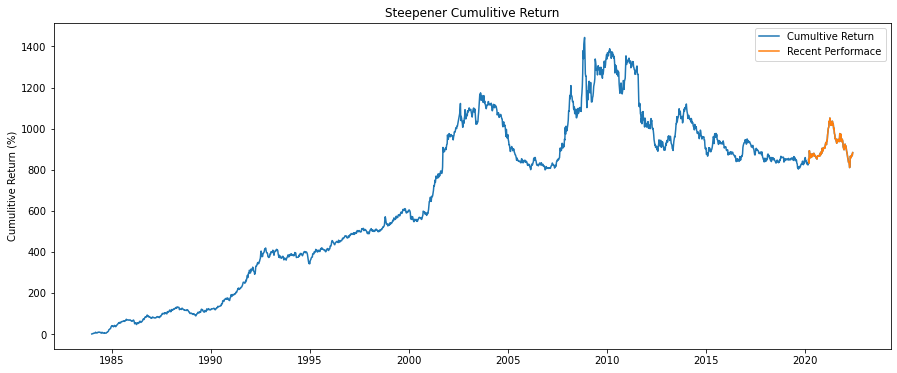

In [10]:
#curve flattened for most of 2010's

plt.figure(figsize=(15,6))
plt.plot(100*(output['capital']/1000-1), label='Cumultive Return');
plt.plot(100*(output['capital']/1000-1).loc[dt.date(2020,3,1):], label='Recent Performace');
#can also do the following two lines below (instead of the two lines from above):
#plt.plot(100*(np.cumprod(1+output['weekly_ret'])-1), label='Cumultive Return');
#plt.plot(100*(np.cumprod(1+output['weekly_ret'])-1).loc[dt.date(2020,3,1):], label='Recent Performace');
plt.title('Steepener Cumulitive Return');
plt.ylabel('Cumulitive Return (%)');
plt.legend();

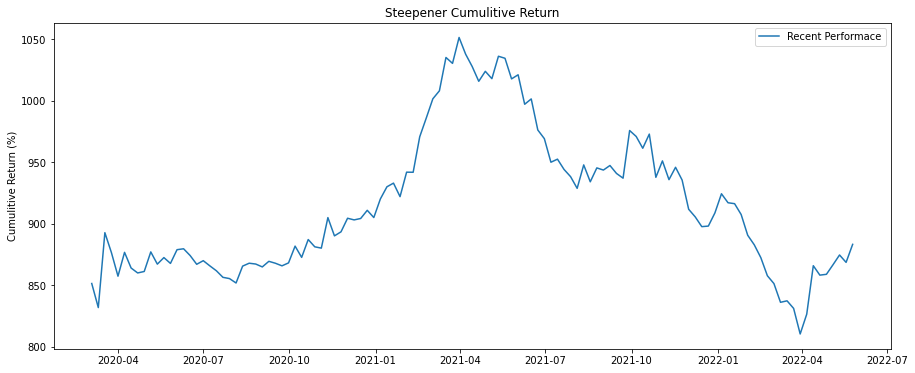

In [11]:
plt.figure(figsize=(15,6))
plt.plot(100*(output['capital']/1000-1).loc[dt.date(2020,3,1):], label='Recent Performace');
plt.title('Steepener Cumulitive Return');
plt.ylabel('Cumulitive Return (%)');
plt.legend();

2. Although the spread trade is DV01-neutral, there is unhedged convexity. Calculate the convexity risk of the spread trade for a 10 basis point change in yields for a constant $1mm (in terms of face value) position in the 10 yr Treasury. Plot the convexity risk over time.

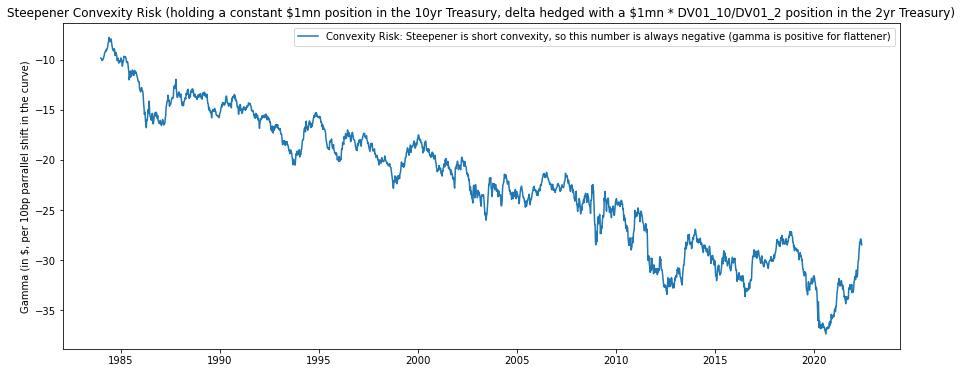

In [12]:
# for example: Suppose the face value is $100, then the number of 10-year bonds traded is $1mm/$1 = 10k, and
# the number of 2-year bonds traded is (DV01_10 / DV01_2) * 10k

data2['DV01_10/DV01_2'] = data2['delta_10'] / data2['delta_2'] #this is 1/x since x = DV01_2/DV01_10

# flattener convexity risk = [1/2 * 1mn (Conv_10 * Price_10 - DV01_10/DV01_2 * Conv_2 * Price_2)] * 0.001^2
convexity_risk = (0.5 * 10000 * (-data2['convexity_10'] * data2['p_10y'] +\
                                 data2['DV01_10/DV01_2'] * data2['convexity_2'] * data2['p_2y']) ) * (0.001**2)

#plot:
plt.figure(figsize=(15,6))
plt.plot(convexity_risk, label='Convexity Risk: Steepener is short convexity, so this number is always negative (gamma is positive for flattener)');
plt.title('Steepener Convexity Risk (holding a constant \$1mn position in the 10yr Treasury, delta hedged with a \$1mn * DV01_10/DV01_2 position in the 2yr Treasury)');
plt.ylabel('Gamma (in $, per 10bp parrallel shift in the curve)');
plt.legend();

###### 3. Each week, calculate the duration and convexity for each leg of your trading strategy. Given your risk metrics, the changes in yields, and the size of your positions, decompose the weekly return into the following components:

###### a) Spread return: the return due to changes in the yield spread using DV01.
###### b) Convexity return: the return due to changes in the yield from convexity.
###### c) Time return: the return due to the passage of time and interest on the cash position.
###### d) Residual: the difference between the total return and the sum of the spread return, convexity return, and time return.
###### Create a plot of the cumulative total return, spread return, convexity return, time return, and the residual. How much did each component contribute to the total return?

### Note: yields are in % --> multiply by 100 to turn into bps, divide by 100 to turn into decimals

In [13]:
output['spread_ret'] = np.nan
output['conv_ret'] = np.nan
output['time_ret'] = np.nan

for date in output.index[1:]: #go from 1/4/1984 to last date
    last_week = date - timedelta(7)
    
    x = output.loc[last_week,'x']
    y = output.loc[last_week,'y']
    p_2y = data2.loc[last_week,'p_2y']
    delta_2 = data2.loc[last_week,'delta_2']
    conv_2 = data2.loc[last_week,'convexity_2']
    p_10y = data2.loc[last_week,'p_10y']
    delta_10 = data2.loc[last_week,'delta_10']
    conv_10 = data2.loc[last_week,'convexity_10']
    
    i_rate_chng_2 = 100*data2.loc[date,'change_y_2y']
    i_rate_chng_10 = 100*data2.loc[date,'change_y_10y']
    
    output.loc[date,'spread_ret'] = y * (-delta_2 * i_rate_chng_2 + x * delta_10 * i_rate_chng_10)
    
    output.loc[date,'conv_ret'] = 0.5 * y * p_2y * conv_2 * ((i_rate_chng_2/1000)**2)
    output.loc[date,'conv_ret'] -= 0.5 * y * x * p_10y * conv_10 * ((i_rate_chng_10/1000)**2)
    output.loc[date,'conv_ret'] /= 100
    
    old_value_10yr_pos = x * y * data2.loc[last_week,'p_10y']
    old_value_2yr_pos = y * data2.loc[last_week,'p_2y']
    old_value_10y_1w_pos = x * y * data2.loc[last_week,'p_10y_1w']
    old_value_2y_1w_pos = y * data2.loc[last_week,'p_2y_1w']

    roll_return = (old_value_10yr_pos - old_value_10y_1w_pos) + (old_value_2y_1w_pos - old_value_2yr_pos)
    output.loc[date,'time_ret'] = output.loc[date,'interest'] + roll_return


In [14]:
output['cum_spread_ret'] = np.cumsum(output['spread_ret'])/initial_capital
output['cum_conv_ret'] = np.cumsum(output['conv_ret'])/initial_capital
output['cum_time_ret'] = np.cumsum(output['time_ret'])/initial_capital

output['cum_total_ret'] = (output['capital']/initial_capital-1)

output['cum_resid_ret'] = output['cum_total_ret'] - output['cum_spread_ret'] - output['cum_conv_ret'] - output[\
                                                                                                'cum_time_ret']

output

,capital,gross_notional,size_cash,interest,weekly_ret,x,y,spread_ret,conv_ret,time_ret,cum_spread_ret,cum_conv_ret,cum_time_ret,cum_total_ret,cum_resid_ret
1983-12-28,1000.000000,10000.000000,-5635.738680,NaN,NaN,0.524775,102.683199,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1984-01-04,1003.666484,10036.664837,-5656.549106,-9.916568,0.003666,0.524212,103.047763,-0.892392,-0.001119,4.588031,-0.000892,-0.000001,0.004588,0.003666,-0.000028
1984-01-11,1014.072180,10140.721805,-5714.212679,-9.801187,0.010368,0.522685,103.935276,5.680542,-0.005006,4.730915,0.004788,-0.000006,0.009319,0.014072,-0.000029
1984-01-18,1020.339497,10203.394972,-5749.172098,-9.848032,0.006180,0.517144,104.261368,1.835809,-0.121093,4.819751,0.006624,-0.000127,0.014139,0.020339,-0.000296
1984-01-25,1018.616861,10186.168612,-5740.526913,-9.952420,-0.001688,0.516806,104.181432,-6.307635,0.004395,4.535308,0.000316,-0.000123,0.018674,0.018617,-0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,9587.987596,95879.875959,-54258.681437,-2.832661,0.000698,0.253573,841.072784,-30.226651,-0.122343,38.488950,-3.352337,-1.896107,13.894885,8.587988,-0.058453
2022-05-04,9665.488549,96654.885486,-54690.078482,-5.441380,0.008083,0.256392,849.556529,43.263414,-1.202855,34.477749,-3.309073,-1.897310,13.929362,8.665489,-0.057491
2022-05-11,9745.254328,97452.543279,-55133.927282,-4.632359,0.008253,0.256653,856.095342,44.454385,0.014932,36.547155,-3.264619,-1.897295,13.965909,8.745254,-0.058741
2022-05-18,9685.127303,96851.273025,-54809.832738,-3.809166,-0.006170,0.255272,851.146148,-97.028788,-0.176622,36.416768,-3.361648,-1.897471,14.002326,8.685127,-0.058080


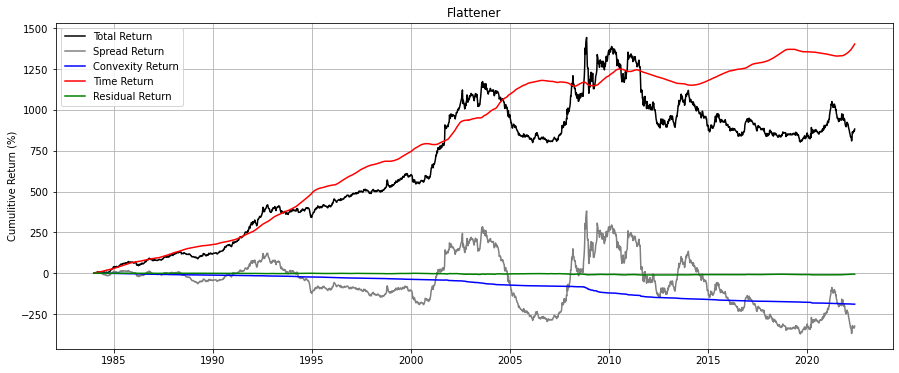

In [15]:
plt.figure(figsize=(15,6))
plt.plot(100*output['cum_total_ret'], label='Total Return', color='black');
plt.plot(100*output['cum_spread_ret'], label='Spread Return', color='grey');
plt.plot(100*output['cum_conv_ret'], label='Convexity Return', color='blue');
plt.plot(100*output['cum_time_ret'], label='Time Return', color='red');
plt.plot(100*output['cum_resid_ret'], label='Residual Return', color='green');

plt.title('Flattener');
plt.ylabel('Cumulitive Return (%)');
plt.grid()
plt.legend();

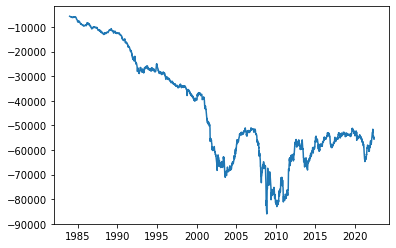

In [16]:
# Question: 10yr yield > 2yr yield (most of the time) 
# and size_cash is always negative for steepener, so shouldn't time return should be negative !?

## Answer: no, although we pay interest on the excess cash position (which is a negative),
## the 2yr bond rolls down harder/faster compared to the roll down of the 10yr bond,
## so the 2yr bond gains value more than the 10yr bond each week as it rolls down the curve (long 2yr, short 10yr)

#plt.plot(1000*(data2['y_10y']-data2['y_2y']));
plt.plot(output['size_cash']);

4. How does a 2% margin requirement impact the cumulative return of your trading strategy? Plot the cumulative total return of the 2% margin requirement compared to the 10% margin requirement.

In [17]:
def steepener(capital_req):
    output = pd.DataFrame(np.nan,index=data2.index, columns=['capital','gross_notional','size_cash',\
                                                             'interest','weekly_ret','x','y'])

    # x = hedge ratio --> this is == DV01_2/DV01_10
    # y = portfolio scaler to scale up to a ($capital / capital requirement) position

    #starting capital on 12/30/1983, can build a position 10x capital size at any point in time
    #capital_req = 0.1
    initial_capital = 1000
    output.loc[dt.date(1983,12,28),'capital'] = initial_capital

    ################################################################################################################
    ################################################################################################################

    #12/30/1983: we have $1000 initial capital. We need to buy 1 unit of 2yr bond & short x units of 10 yr bond
    date = dt.date(1983,12,28)
    x = data2.loc[date,'delta_2'] / data2.loc[date,'delta_10']
    output.loc[date,'x'] = x

    output.loc[date,'gross_notional'] = x * data2.loc[date,'p_10y'] + data2.loc[date,'p_2y']

    #we can lever this trade up and short y units of 2yr and buy y*x units of 10 yr
    # capital_req = 10% --> can lever to $(10*capital) gross notional
    #capital_req = 0.1
    y = (output.loc[date,'capital']/capital_req) / output.loc[date,'gross_notional']
    output.loc[date,'y'] = y
    output.loc[date,'gross_notional'] *= y

    output.loc[date,'size_cash'] = y*(-data2.loc[date,'p_2y'] + x*data2.loc[date,'p_10y']) + output.loc[date,'capital']
    #check --> portfolio is delta neutral
    print(-y*data2.loc[date,'delta_2'] + x*y*data2.loc[date,'delta_10'])

    ################################################################################################################
    ################################################################################################################

    for date in output.index[1:]: #go from 1/4/1984 to last date
        last_week = date-timedelta(7)
        # a)
        #this is stored in data2.loc[date,p_10y_1w] and data2.loc[date,p_2y_1w]
        # last week: shorted y units of 2yr bonds & bought x*y units of 10yr bonds

        # b)
        # in flattener: we have a positive "size_cash" so we earn the 1-week interest rate
        one_week_rate = data2.loc[last_week,'y_1w']/100 #convert to decimals
        output.loc[date,'size_cash'] = output.loc[last_week,'size_cash'] * ((1 + one_week_rate)**(7/365))
        output.loc[date,'interest'] = output.loc[date,'size_cash'] - output.loc[last_week,'size_cash']

        # c) 
        # closing out: buy back the 2yr bond (y units) and sell the 10yr bond (x*y units)
        x = output.loc[last_week,'x']
        y = output.loc[last_week,'y']
        new_value_10yr_position = x * y * data2.loc[date,'p_10y_1w']
        new_value_2yr_position = y * data2.loc[date,'p_2y_1w']

        output.loc[date,'capital'] = output.loc[date,'size_cash'] + new_value_2yr_position - new_value_10yr_position

        # now: repeat and reinvest in a new flattener position
        x = data2.loc[date,'delta_2'] / data2.loc[date,'delta_10']
        output.loc[date,'x'] = x

        output.loc[date,'gross_notional'] = x * data2.loc[date,'p_10y'] + data2.loc[date,'p_2y']

        #we can lever this trade up and short y units of 2yr and buy y*x units of 10 yr
        # capital_req = 10% --> can lever to $(10*capital) gross notional
        #capital_req = 0.1
        y = (output.loc[date,'capital']/capital_req) / output.loc[date,'gross_notional']
        output.loc[date,'y'] = y
        output.loc[date,'gross_notional'] *= y

        output.loc[date,'size_cash'] = y*(-data2.loc[date,'p_2y'] + x*data2.loc[date,'p_10y']) + output.loc[date,\
                                                                                                        'capital']
        #check --> portfolio is delta neutral
        #print(round(y*data2.loc[date,'delta_2'] - x*y*data2.loc[date,'delta_10']))

        # d)
        output.loc[date,'weekly_ret'] = (output.loc[date,'capital'] / output.loc[last_week,'capital']) -1

    ################################################################################################################
    ################################################################################################################

    #curve flattened for most of 2010's
    
    plt.figure(figsize=(15,6))
    plt.plot(100*(output['capital']/1000-1), label='Cumultive Return');
    plt.plot(100*(output['capital']/1000-1).loc[dt.date(2020,3,1):], label='Recent Performace');
    #can also do the following two lines below (instead of the two lines from above):
    #plt.plot(100*(np.cumprod(1+output['weekly_ret'])-1), label='Cumultive Return');
    #plt.plot(100*(np.cumprod(1+output['weekly_ret'])-1).loc[dt.date(2020,3,1):], label='Recent Performace');
    plt.title('Steepener Cumulitive Return');
    plt.ylabel('Cumulitive Return (%)');
    plt.legend();

8.881784197001252e-16


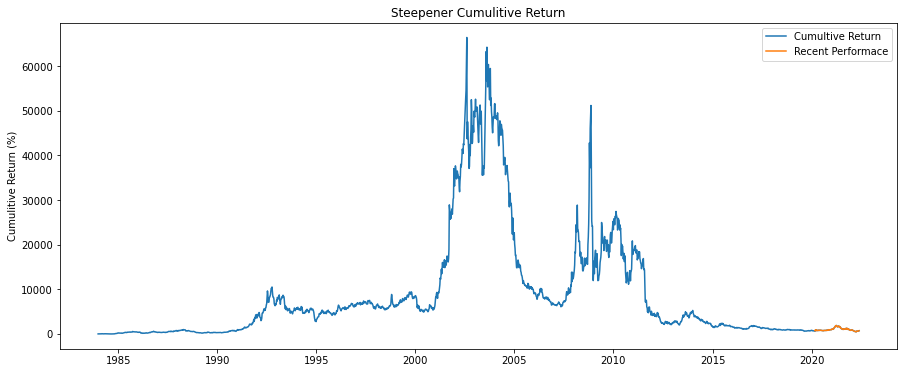

In [18]:
steepener(0.02)